## Soild classifier train

In [142]:
import torch
import torchvision
import pathlib
import glob
from torchvision.transforms import transforms

In [143]:
class ConvNet(torch.nn.Module):
    def __init__(self, num_classes):
        super(ConvNet, self).__init__()
        # self.batchSize = batch_size

        # ((inputsize-kernel+2*Padding)/stride) +1
        self.conv1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=3, out_channels=12, kernel_size=(3,3), stride=1, padding=1),
            torch.nn.BatchNorm2d(num_features=12),
            torch.nn.ReLU(),
        )

        self.maxpool1 = torch.nn.MaxPool2d(kernel_size=(2,2))


        self.conv2 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=12, out_channels=20, kernel_size=(3,3), stride=1, padding=1),
            torch.nn.BatchNorm2d(num_features=20),
            torch.nn.ReLU(),
        )

        self.conv3 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=20, out_channels=30, kernel_size=(3,3), stride=1, padding=1),
            # output: 30,20,20
            torch.nn.BatchNorm2d(num_features=30),
            torch.nn.ReLU(),
        )

        self.maxpool2 = torch.nn.MaxPool2d(kernel_size=(2,2))


        # Flatten the output before fully connected layers
        self.flatten = torch.nn.Flatten()

        # Fully connected layers
        self.fc1 = torch.nn.Linear(in_features=30* 37* 37, out_features=128)
        self.relu4 = torch.nn.ReLU()

        self.fc2 = torch.nn.Linear(in_features=128, out_features=num_classes)

    def forward(self, x):
        x = self.conv1(x)

        x = self.maxpool1(x)

        x = self.conv2(x)

        x = self.conv3(x)

        x = self.maxpool2(x)

        # Flatten the output
        x = self.flatten(x)

        # Fully connected layers
        x = self.fc1(x)

        x = self.relu4(x)

        x = self.fc2(x)


        return x


In [144]:
# Get cpu, gpu or mps device for training.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [145]:
model = ConvNet(num_classes=3).to(device=device)

In [146]:
print(model)

ConvNet(
  (conv1): Sequential(
    (0): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (maxpool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Sequential(
    (0): Conv2d(12, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv3): Sequential(
    (0): Conv2d(20, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (maxpool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=41070, out_features=128, bias=True)
  (relu4): ReLU()
  (fc2): Linear(in_features=128, out_features

In [147]:
transformer = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ColorJitter(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(+90),
    transforms.ToTensor(),  # 0-255 to 0-1, numpy to tensors
    transforms.Normalize([0.5, 0.5, 0.5],  # 0-1 to [-1,1] , formula (x-mean)/std
                         [0.5, 0.5, 0.5])
])

In [148]:
train_path = './data/train'
val_path = './data/validation'

In [149]:
batchSize = 4
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(train_path, transform=transformer),
    batch_size=batchSize, shuffle=True
)
val_loader = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(val_path, transform=transformer),
    batch_size=batchSize//2, shuffle=True
)

In [150]:
# categories
root = pathlib.Path(train_path)
classes = sorted([j.name.split('/')[-1] for j in root.iterdir()])

# CNN Network
print(classes)

['Gravel', 'Sand', 'Silt']


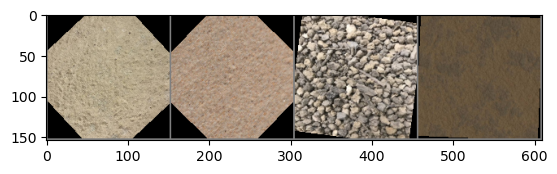

Sand  Sand  Gravel Silt 


In [170]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batchSize)))

In [151]:
model = ConvNet(num_classes=len(classes)).to(device)

In [152]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [153]:
# calculating the size of training and testing images
train_count = len(glob.glob(train_path + '/**/*.jpg'))
test_count = len(glob.glob(val_path + '/**/*.jpg'))

In [154]:
print(train_count, test_count)


147 147


Epoch 0 - Training Loss: 0.3338, Training Accuracy: 95.33%, Validation Loss: 0.0916, Validation Accuracy: 96.00%
Epoch 1 - Training Loss: 0.0044, Training Accuracy: 90.67%, Validation Loss: 0.1280, Validation Accuracy: 95.33%
Epoch 2 - Training Loss: 0.3327, Training Accuracy: 90.00%, Validation Loss: 0.1485, Validation Accuracy: 92.67%
Epoch 3 - Training Loss: 0.0038, Training Accuracy: 89.33%, Validation Loss: 0.1329, Validation Accuracy: 94.00%
Epoch 4 - Training Loss: 0.2288, Training Accuracy: 89.33%, Validation Loss: 0.1005, Validation Accuracy: 95.33%
Epoch 5 - Training Loss: 0.0003, Training Accuracy: 96.00%, Validation Loss: 0.1072, Validation Accuracy: 93.33%
Epoch 6 - Training Loss: 3.2829, Training Accuracy: 94.67%, Validation Loss: 0.1151, Validation Accuracy: 96.00%
Epoch 7 - Training Loss: 0.0007, Training Accuracy: 92.00%, Validation Loss: 0.1280, Validation Accuracy: 96.00%
Epoch 8 - Training Loss: 0.0905, Training Accuracy: 89.33%, Validation Loss: 0.1237, Validation 

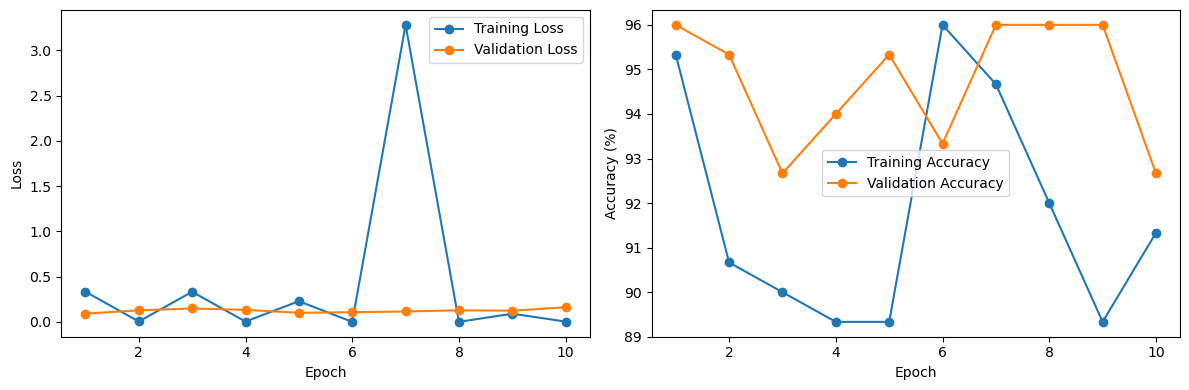

In [161]:
import matplotlib.pyplot as plt

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(10):
    # Training
    model.train()
    correct_train = 0
    total_train = 0

    for X, y in train_loader:
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        output = model(X)
        loss = torch.nn.functional.cross_entropy(output, y)
        loss.backward()
        optimizer.step()

        _, predicted_train = output.max(1)
        total_train += y.size(0)
        correct_train += predicted_train.eq(y).sum().item()

    train_loss = loss.item()
    train_accuracy = 100 * correct_train / total_train

    # Validation
    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        correct_val = 0
        total_val = 0

        for X_val, y_val in val_loader:
            X_val, y_val = X_val.to(device), y_val.to(device)

            val_output = model(X_val)
            val_loss += torch.nn.functional.cross_entropy(val_output, y_val).item()

            _, predicted_val = val_output.max(1)
            total_val += y_val.size(0)
            correct_val += predicted_val.eq(y_val).sum().item()

    average_val_loss = val_loss / len(val_loader)
    accuracy_val = 100 * correct_val / total_val

    # Store values for plotting
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(average_val_loss)
    val_accuracies.append(accuracy_val)

    print(f"Epoch {epoch} - Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%, "
          f"Validation Loss: {average_val_loss:.4f}, Validation Accuracy: {accuracy_val:.2f}%")

# Plotting the training and validation loss and accuracy per epoch
epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(12, 4))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss', marker='o')
plt.plot(epochs, val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracies, label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

In [162]:
test_path = './data/test'
test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(test_path, transform=transformer),
    batch_size=batchSize, shuffle=True
)

model.eval()  # Set the model to evaluation mode

with torch.no_grad():
    test_loss = 0.0
    correct = 0
    total = 0

    for X_test, y_test in test_loader:
        print(y_test)
        X_test, y_test = X_test.to(device), y_test.to(device)

        test_output = model(X_test)
        test_loss += torch.nn.functional.cross_entropy(test_output, y_test).item()
        print(test_output)

        _, predicted = test_output.max(1)
        total += y_test.size(0)
        correct += predicted.eq(y_test).sum().item()

    average_test_loss = test_loss / len(test_loader)
    accuracy = correct / total

    print(f"Test Loss: {average_test_loss:.4f}, Accuracy: {100 * accuracy:.2f}%")

tensor([1, 1, 0, 2])
tensor([[-28.4987,  -7.8907, -18.4331],
        [-17.7692,  -2.6288,  -8.2719],
        [  9.4606, -14.4251, -25.4500],
        [ -4.5955,  -3.4854,   1.3243]])
tensor([1, 0, 2, 0])
tensor([[-1.9429e+01, -2.7648e+00, -9.6197e+00],
        [ 2.7168e+00, -7.0628e+00, -1.0287e+01],
        [-4.8583e-03, -1.5384e+00, -2.6046e+00],
        [ 6.0453e+00, -8.7790e+00, -1.4978e+01]])
tensor([2, 0, 1, 2])
tensor([[ -1.2001,  -1.5466,  -0.2306],
        [  7.3198, -10.4728, -19.0214],
        [-13.2492,  -3.4124,  -9.2699],
        [ -1.3623,  -1.6392,  -0.8352]])
tensor([0, 2, 0, 1])
tensor([[ 3.4345, -4.8467, -8.3710],
        [-0.8221, -5.2020, -1.6896],
        [ 2.8886, -6.0601, -9.5235],
        [-9.6095,  1.7586, -1.6321]])
tensor([2, 1])
tensor([[ -8.1794,  -2.2587,   3.4654],
        [-30.0835,  -7.9779, -18.6290]])
Test Loss: 0.2676, Accuracy: 88.89%
